# <center> Esej 1 - Strategije u igrama na sreću (Matematički softver, PMFMO)

## Sažetak

## Uvod

Vrlo zanimljivi dio Pythona, kao i programiranja općenito, uvijek su mi bile pseudoslučajne funkcije odnosno brojevi. Pomoću njih možemo, primjerice, simulirati bacanje kocke. Pritom je velika prednost nad stvarnim bacanjem ta da se može izvršiti vrlo brzo, a stoga i veliki broj puta.

In [171]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
%matplotlib notebook
import scipy.stats as stats
import copy
import functools as ft

Za početak možemo napisati funkciju koja računa aritmetičku sredinu $N$ bacanja kocke. Jaki zakon velikih brojeva jamči da će gotovo sigurno limes parcijalnih aritmetičkih sredina biti jednak matematičkom očekivanju, tj. 
$\underset{n}{\lim} \bar{X}_n = \mathbb{E} X_1$ ako je $X_i$ slučajna varijabla koja odgovara $i$-tom bacanju kocke. Lako izračunamo da je $\mathbb{E}X_1 = 7/2$. S većim brojem bacanja intuitivno očekujemo veću preciznost, odnosno manju razliku tzv. empirijskog i teoretskog očekivanja.

In [71]:
def ars (N = 10000):    
    print(np.average(np.random.randint(1,7,N)))

In [78]:
ars(10)
ars(100000)

2.2
3.50006


Možemo i pratiti parcijalne aritmetičke sredine i promatrati njihovo ponašanje kako se $n$ povećava od $1$ do $N$.

In [117]:
def parcars (N = 1000):
    x = list(range(N+1))
    L = [None] * (N+1)
    L[0] = np.random.randint(1,7)
    for i in range(1,N):
        L[i] = (L[i-1] * i + np.random.randint(1,7)) / (i+1)
    
    plt.plot(x, L, color = 'black')
    plt.plot(x, [3.5] * (N+1), color = 'red')

<IPython.core.display.Javascript object>


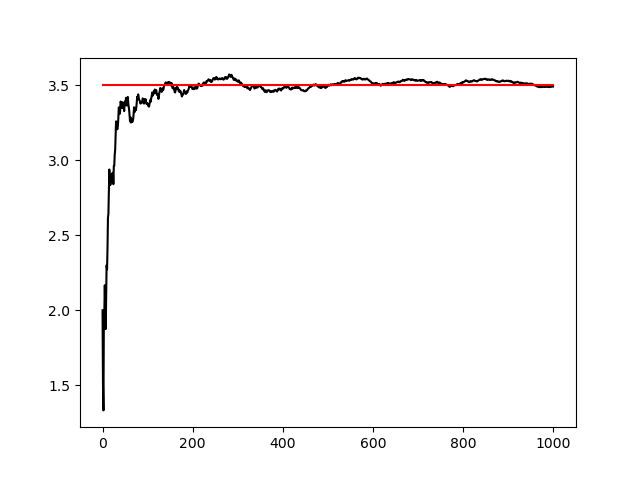

In [120]:
parcars(1000)

Alternativno, možemo napraviti animirani graf koji se nastavlja nadopunjavati proizvoljno dugo, služeći se [1] i [2].

<IPython.core.display.Javascript object>


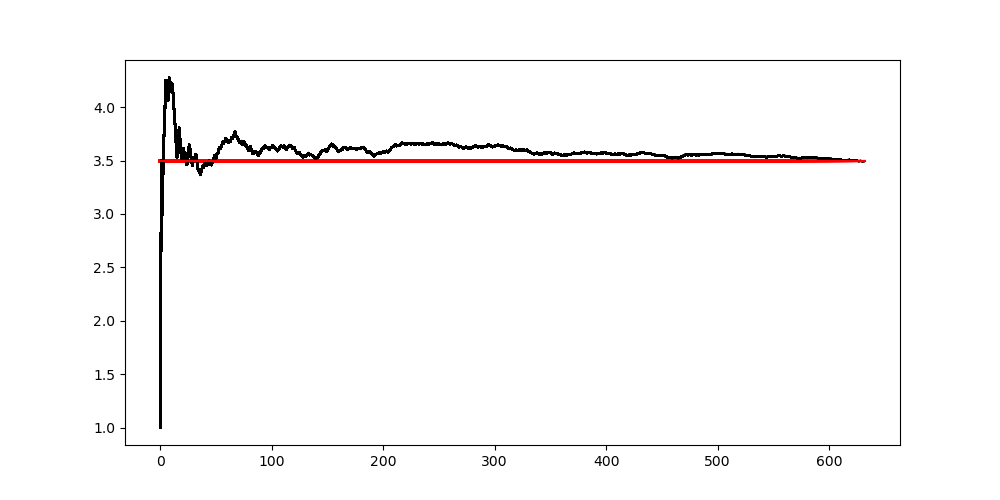

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

x = [0]
L = [np.random.randint(1,7)]
y = [3.5]

def parcars_anim(i):
    i += 1
    L.append((L[-1] * i + np.random.randint(1,7)) / (i+1))
    x.append(i)
    y.append(3.5)
    
    axes.plot(x, L, color='black')
    axes.plot(x, y, color = 'red')

ani = animation.FuncAnimation(fig, parcars_anim, interval = 10, blit = True)
plt.show()

To da očekujemo manje razlike do očekivanja za veće $n$ upravo je ekvivalentno tome da je varijanca manja za veći $n$. Varijable $X_i$ su međusobno nezavisne i jednako distribuirane (to je uostalom uvjet da bismo uopće primijenili jaki zakon velikih brojeva) pa znamo da je $$\text{Var} \bar{X}_n = \frac{\text{Var} X_1}{n} \rightarrow 0, \ \ n \rightarrow \infty$$
a pritom je lako izračunati $\text{Var} X_1 = 35/12$. Uvjeti su zadovoljeni i za centralni granični teorem, koji govori da $\frac{\bar{X}_n - 7/2}{\sqrt{35/12}}\sqrt{n}$ po distribuciji konvergira k $N(0, 1)$. To je još jedna pojava koju možemo prikazati grafički. Takav prikaz zanimljiv je i šire kao vizualizacija teorema koji se laiku može činiti nejasan ili neintuitivan.

Zanimljivo je i pitanje distribucije $\bar{X}_n$ za fiksni $n$. Riječ je o varijabli s konačnom slikom pa stoga možemo distribuciju naći eksplicitno prolaskom po svim "slučajevima" u eksponencijalnoj složenosti, ili, što je puno bolje, računajući s konvolucijama. Alternativno, za veće $n$ možemo distribuciju aproksimirati simulacijama. To nije puno bolje jer veći $n$ daje više mogućih ishoda pa time zahtijeva i više bacanja za suvislije aproksimacije. Jasno, u praksi ćemo znajući što znamo za velike $n$ distribuciju aproksimirati normalnom.

U `numpy` postoji metoda `numpy.convolve` koja će biti od koristi (v. [3]). Pomoću biblioteke `stats` između ostalog možemo koristiti funckije gustoće poznatih razdioba (v. [4]).

<IPython.core.display.Javascript object>


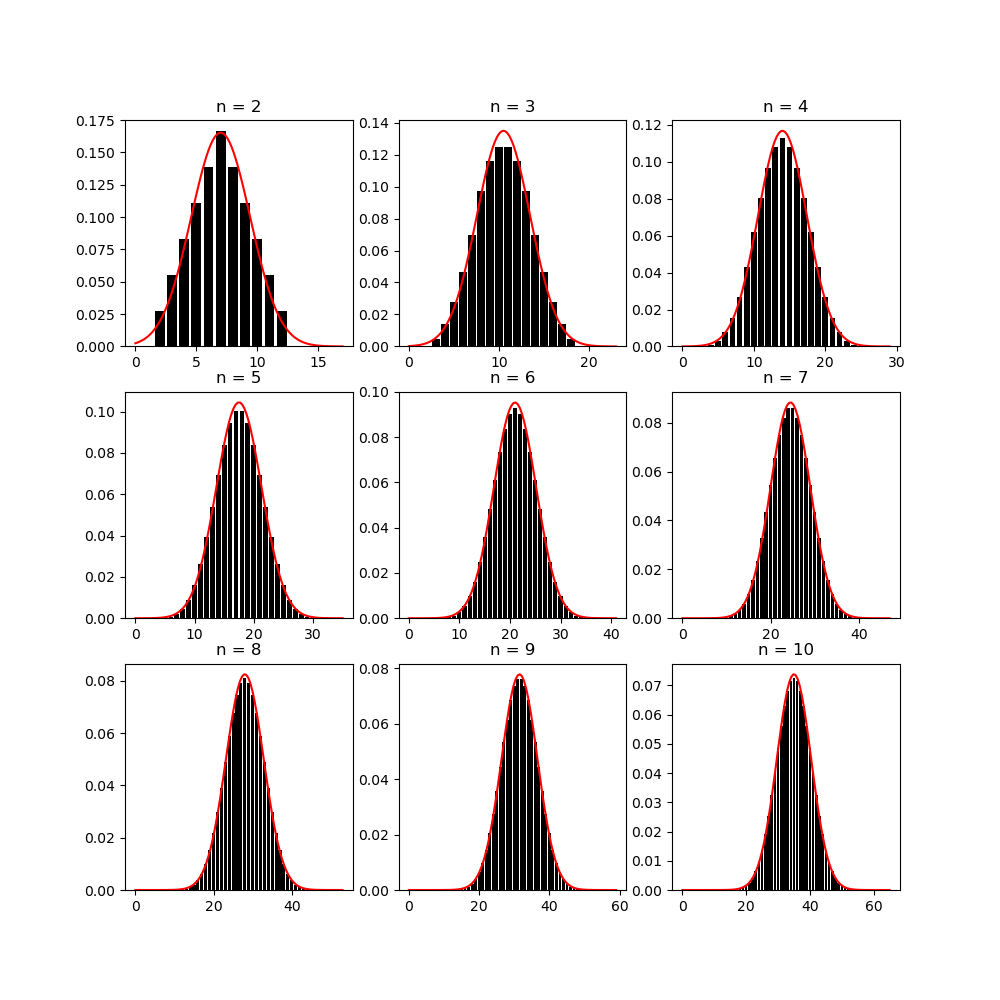

In [65]:
N1, N2 = 3, 3
N = N1 * N2
fig, axes = plt.subplots(nrows=N1, ncols=N2, figsize=(10,10))

distrib = [None] * (N+2)
distrib[1] = np.array([1/6]*6)

for i in range(2, N + 2):
    distrib[i] = np.convolve(distrib[i-1], distrib[1])
    
    x = list(range(i, 6*i + 1))
    y = list(distrib[i])    
    rv = stats.norm(i*7/2,np.sqrt(35*i/12))  
    xn = np.linspace(0, 6*i + 5, 100)
    
    axes[(i-2) // N1, (i-2) % N2].plot(xn, rv.pdf(xn) , color = 'red')
    axes[(i-2) // N1, (i-2) % N2].bar(x,y, color = 'black')
    axes[(i-2) // N1, (i-2) % N2].set_title(f'n = {i}')

Gornji grafovi zapravo prikazuju distribuciju $\sum_{i=1}^n X_i$ u odnosu na $N(7n/2, 35n/12)$. Sljedeći kod daje animaciju istog kad se $n$ povećava.

<IPython.core.display.Javascript object>


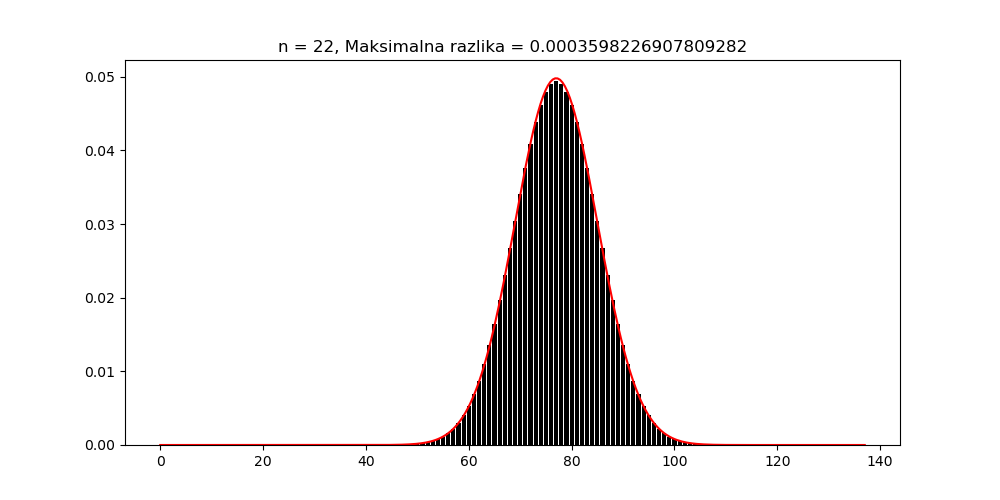

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

distrib = [np.array([1])]
kocke = np.array([1/6]*6)

def distrib_anim(i):
    i += 1
    axes.clear()
    
    distrib.append(np.convolve(distrib[-1], kocke))
    
    x = list(range(i, 6*i + 1))
    y = distrib[i]
    rv = stats.norm(i*7/2,np.sqrt(35*i/12))  
    xn = np.linspace(0, 6*i + 5, 10*(i+7))
        
    yteor = rv.pdf(x)
    maxdist = abs(y - yteor).max()
    
    axes.plot(xn, rv.pdf(xn) , color = 'red')
    axes.bar(x,y, color = 'black')
    axes.set_title(f'n = {i}, Maksimalna razlika = {maxdist}')

ani = animation.FuncAnimation(fig, distrib_anim, interval = 100)
plt.show()

## Igre i strategije

Neka sada bacamo točno $5$ kocaka. U jednom bacanju, najzanimljiviji rezultat koji možemo dobiti je jamb ($5$ istih). Lako je izračunati da je vjerojatnost dobivanja tzv. ručnog jamba $\frac{6}{6^5} = \frac{1}{6^4} \approx 0,07716049382716049382716049382716 \%$. Možemo probati sličan rezultat dobiti empirijski.

In [171]:
def rucni_jamb(N):
    br = 0
    for i in range(N):
        #if (np.var(np.random.randint(1,7,5)) == 0): #sporije
        #   br += 1
        x = np.random.randint(1,7,5)
        if (x[0] == x[1] == x[2] == x[3] == x[4]):
            br += 1
    print (f'rucni jamb u {br} od {N}, \nemp. vjerojatnost {br*100/N}%\nodstupanje od teoretske: {100*abs(6**-4 - br/N)}%; rel: {100*(abs(6**-4 - br/N)) / (6**-4)}%')

In [172]:
%%time
rucni_jamb(1000000)

rucni jamb u 728 od 1000000, 
emp. vjerojatnost 0.0728%
odstupanje od teoretske: 0.004360493827160488%; rel: 5.651199999999992%
Wall time: 5.9 s


Sada malo zakomplicirajmo, tako da jamb pokušavamo dobiti u tri bacanja kao u istoimenoj igri (v. [5]). Sada je manje jasno kako odrediti (teoretsku) vjerojatnost uspjeha. Kao prvo, pitanje je kako ćemo odrediti koje kocke bacamo ponovo. Ovdje je to jednostavno - kocke s onim brojem kojeg imamo najviše ćemo zadržati, a ostale baciti ponovo. 

Prvo pokušajmo procijeniti tu vjerojatnost empirijski. Da si pomognemo, napravit ćemo klasu `kocke`. Rezultat koji dobijemo bacanjem kocaka poistovjetit ćemo s listom gdje na mjestu $i$, $1 \leq i \leq 6$ stoji broj kocaka koje su pale na broj $i$. To radimo jer nikakav poredak kocaka neće biti bitan. Nadalje ćemo takvu listu zvati *raspored*. Prednost rasporeda je da ih ima samo $\binom{5+6-1}{6-1} = 252$ jer je riječ o nenegativnim cjelobrojnim rješenjima jednadžbe $x_1 + ... + x_6 = 5$. Ako bismo rezultate kodirali kao nizove koji razlikuju poredak, bilo bi ih $6^5 = 7776$. Mana ovog pristupa je da nije svaki raspored jednako vjerojatan. Ipak, nije teško ustanoviti da je vjerojatnost da pri bacanju $5$ kocaka raspored bude $(k_1,...,k_6)$ jednaka
$$\frac{5!}{6^5 k_1!...k_6!}$$ Ako smo prešli iz $(k_1, ..., k_6)$ u $(k_1',...,k_6')$ znajući kojih $m$ kocaka smo bacili, možemo izračunati $d_1,...,d_6$ tako da je palo $d_1$ jedinica, ..., $d_6$ šestica, a vjerojatnost je analogno
$$\frac{m!}{6^m d_1! ... d_6!}$$


Vidimo da će se faktorijeli i potencije broja $6$ računati vrlo često, pa ćemo pomoću `@ft.cache` (v. [6]) ubrzati program memoizacijom.

In [179]:
@ft.cache
def pow6(k):
    return 6 * pow6(k-1) if k else 1
    

@ft.cache
def fakt(k):
    return k * fakt(k-1) if k else 1

def p0(raspored, m = 5):
    u = fakt(m)/pow6(m)
    for i in range(1,7):
        u /= fakt(raspored[i])
    return u
    

In [153]:
class kocke():
    def __init__(self, raspored = None, br_kocaka = 5):
        if (raspored != None): #konstruktoru je dan raspored
            self.raspored = raspored
        else:
            self.raspored = [0] * 7
            for i in range(br_kocaka):
                self.raspored[np.random.randint(1,7)] += 1
        self.broj_bacanja = 1
        self.vjer = p0(self.raspored)
    
    def __str__(self):
        return f'{self.raspored}, vjer: {self.vjer}, broj bacanja: {self.broj_bacanja}\n'
    
    def __eq__(self, other):
        return (self.raspored == other.raspored)
    
    def baci(self, podraspored): #podraspored daje kocke koje bacamo ponovo
        novi = copy.deepcopy(self)
        d = [0] * 7
        m = 0
        for i in range(1,7):
            novi.raspored[i] -= podraspored[i]
            m += podraspored[i]
            for j in range(podraspored[i]):
                x = np.random.randint(1,7)
                novi.raspored[x] += 1
                d[x] += 1
        novi.vjer = p0(d, m) * self.vjer
        novi.broj_bacanja = self.broj_bacanja + 1
        return novi

In [187]:
def greedy_jamb(K): #strategija opisana u gornjem tekstu, arg. je tipa kocke
    maks, maksidx = -1, -1
    for idx, val in enumerate(K.raspored):
        if (val >= maks):
            maks, maksidx = val, idx
        
    L = copy.deepcopy(K.raspored)
    L[maksidx] = 0
    return L


def is_jamb(raspored):
    for i in raspored:
        if  (i == 5):
            return 1
    return 0


def emp(N, strategija, fja_vrednovanja, B = 3):
    suma = 0
    for i in range(N):
        K = kocke()
        for j in range(B-1):
            K = K.baci(strategija(K))
        suma += fja_vrednovanja(K.raspored)
    #print(f'Prosjecni rezultat od {suma/N}')
    return suma/N
    

In [188]:
%%time
for i in range(5):
    print(f'vjer: {emp(100000, greedy_jamb, is_jamb)}')

vjer: 0.04483
vjer: 0.04547
vjer: 0.0462
vjer: 0.04566
vjer: 0.04634
Wall time: 24.2 s


Jasno nam je da je vjerojatnost koja nas je zanimala $4,5-4,7 \%$. Ako želimo, na temelju uzorka možemo naći i pouzdani interval.

Možda zasad nije jasno zašto govorimo o strategiji kad je viđena vrlo nezanimljiva. No, igra se može zakomplicirati na razne načine. Prvo, ne mora svaki jamb biti jednako vrijedan. U jambu (igri), jamb $k$-ica vrijedi $5k + 50$ bodova. Obzirom da je dobiti jamb rijetkost, ta razlika nije dovoljno velika da radi nje zadržimo veći broj čak i ako imamo više manjeg. S druge strane, da se dobije npr. $10^{10^k}$ bodova, jamb šestica vrijedio bi toliko više da bi se uvijek isplatilo "ciljati" na šestice. Ne samo to, nego može nam umjesto jamba cilj biti nešto posve drugo. Ako je $R$ skup rasporeda, možemo općenito definirati funkciju vrednovanja $v : R \rightarrow \mathbb{R}$ takvu da iza sebe ne mora imati nikakvu intuiticiju. U gornjem primjeru funkcija vrednovanja je bila $(k_1,...,k_6) \mapsto \mathbb{1}_{\{ k_1 ,...,k_6\}}(5)$.

Jasno je da će za manje lijepe funkcije vrednovanja i optimalni način igre biti teži za naći intuitivno. Spomenuti način igre zapravo podrazumijeva koje ćemo kocke baciti ponovo za dane kocke koje imamo trenutno. U nekim slučajevima može ovisiti i o vremenu (na kojem smo bacanju). Dakle, strategiju možemo definirati kao funkciju $G: R \times \{ 1, 2 \} \rightarrow R'$ gdje je $R'$ skup podrasporeda, tj. $R' = \{ x_1,...,x_6 \in \mathbb{N}_0 \ | \ x_1+...+x_6 \leq 5 \}$. Pritom je jasno da mora vrijediti $G(r, \cdot) \preceq r, \ \forall r \in R$. Broj strategija očito je izuzetno velik. Stoga je evaluacija svih mogućih strategija realno izvediva jedino za manji broj kocaka ili možda kocke s manjim brojem strana. Svejedno, jer je skup strategija konačan, za danu funkciju vrednovanja postoji ona koja (ne nužno strogo) maksimizira $\mathbb{E}(v(r_3))$ gdje je $r_i$ $i$-ti raspored koji je pao. Takva notacija ima smisla jer $r_1, r_2,...$ u paru sa stohastičkim matricama induciranim strategijom čine Markovljev lanac.

Gornju funkciju `emp` napisali smo u velikoj općenitosti s obzirom na funkciju vrednovanja i strategiju pa ju možemo iskoristiti i za još štogod. Npr. s istom strategijom možemo tražiti vjerojantnost dobivanja pokera.

In [193]:
def is_poker(raspored):
    for i in raspored:
        if  (i >= 4):
            return 1
    return 0

In [195]:
print(f'vjer: {emp(100000, greedy_jamb, is_poker)}')

vjer: 0.29066


Funkcija `emp` podržava i izmjene broja bacanja. Zato možemo nacrtati graf koji pokazuje rast vjerojatnosti uspjeha (ili, općenito, rast očekivanog $v$) s rastom broja bacanja. Zbog brzine moramo paziti da broj iteracija `N` i maksimalni broj iteracija `maxB` ne budu preveliki.

In [215]:
def emp_graf(N, strategija, fja_vrednovanja, maxB):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

    x = []
    y = []
    for i in range(3, maxB + 1):
        x.append(i)
        y.append(emp(N, strategija, fja_vrednovanja, i))
    
    axes.plot(x, y, color = 'black')
    axes.set_xlabel('Broj bacanja')

<IPython.core.display.Javascript object>


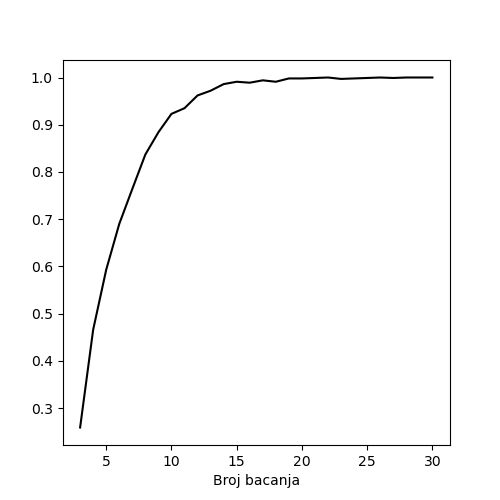

In [216]:
emp_graf(1000, greedy_jamb, is_poker, 30)

## Bibliografija

[1] https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389

[2] https://www.geeksforgeeks.org/matplotlib-animate-multiple-lines/

[3] https://numpy.org/doc/stable/reference/generated/numpy.convolve.html

[4] https://docs.python.org/3/library/statistics.html#statistics.NormalDist.pdf

[5] https://playtoy.tportal.hr/jambalaja/rules/122

[6] https://docs.python.org/3/library/functools.html

## Završni i tehnički komentari